Import libraries

In [1839]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Import tables from csv files

In [1840]:
shipMode_df = pd.read_csv("DIM_SHIPMODE.csv", encoding='latin1')
fact_df = pd.read_csv("FACT_sales.csv", encoding='latin1')
orderpriority_df = pd.read_csv("DIM_ORDERPRIORITY.csv", encoding='latin1')
market_df = pd.read_csv("DIM_MARKET.csv", encoding='latin1')

In [1841]:
fact_df

,Row ID,Order ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order Date,Shipping ID,returned,...,ORDERPRIORITY_ID,Ship Date,SHIPMODE_ID,LOCATION_ID,Shipping Ratio,Order_to_Ship_Time,Discount_Label,Return_lable,Product ID,Customer ID
0,5930,MX-2014-141208,661.320007,2,0.0,205,47.069,"Wednesday, July 2, 2014",23032,0,...,2,"Sunday, July 6, 2014",4,859,0.071174,4,No Discount,0,44,21
1,1299,MX-2014-121076,162.759995,2,0.0,27.64,6.633,"Thursday, May 8, 2014",28393,0,...,2,"Thursday, May 15, 2014",4,2371,0.040753,7,No Discount,0,186,64
2,3063,MX-2013-115084,191.960007,2,0.0,30.68,14.717,"Tuesday, October 8, 2013",33576,0,...,2,"Saturday, October 12, 2013",4,3011,0.076667,4,No Discount,0,112,102
3,2811,MX-2014-137554,164.600006,2,0.0,21.36,9.245,"Friday, March 14, 2014",36259,0,...,2,"Thursday, March 20, 2014",4,2075,0.056166,6,No Discount,0,128,564
4,268,MX-2014-159282,607.359985,2,0.0,133.6,0.875,"Monday, July 21, 2014",37957,0,...,2,"Saturday, July 26, 2014",4,799,0.001441,5,No Discount,0,263,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49665,9335,MX-2013-141425,28.351999,2,0.2,7.43,1.719,"Friday, September 13, 2013",41985,0,...,2,"Thursday, September 19, 2013",4,29,0.060631,6,Discount,0,1733,168
49666,9336,MX-2013-141425,61.824001,2,0.2,17.74,2.808,"Friday, September 13, 2013",41985,0,...,2,"Thursday, September 19, 2013",4,29,0.045419,6,Discount,0,2834,168
49667,9357,US-2013-132374,44.784000,3,0.2,-11.2,2.494,"Thursday, November 21, 2013",42408,0,...,2,"Monday, November 25, 2013",4,29,0.055690,4,Discount,0,1455,711
49668,9160,US-2014-115658,23.712000,3,0.2,-2.09,1.482,"Monday, January 6, 2014",43921,0,...,2,"Sunday, January 12, 2014",4,29,0.062500,6,Discount,0,852,50


In [1842]:
My_DF = fact_df[['Order ID','Shipping Cost','MARKET_ID','ORDERPRIORITY_ID','LOCATION_ID','SHIPMODE_ID','Sales','Quantity','Order_to_Ship_Time']]
My_DF = My_DF.merge(shipMode_df,on='SHIPMODE_ID')
My_DF = My_DF.merge(orderpriority_df,on='ORDERPRIORITY_ID')
My_DF = My_DF.merge(market_df,on='MARKET_ID')
My_DF


,Order ID,Shipping Cost,MARKET_ID,ORDERPRIORITY_ID,LOCATION_ID,SHIPMODE_ID,Sales,Quantity,Order_to_Ship_Time,Ship Mode,Order Priority,Market
0,MX-2014-141208,47.069,7,2,859,4,661.320007,2,4,Standard Class,Medium,LATAM
1,MX-2014-121076,6.633,7,2,2371,4,162.759995,2,7,Standard Class,Medium,LATAM
2,MX-2013-115084,14.717,7,2,3011,4,191.960007,2,4,Standard Class,Medium,LATAM
3,MX-2014-137554,9.245,7,2,2075,4,164.600006,2,6,Standard Class,Medium,LATAM
4,MX-2014-159282,0.875,7,2,799,4,607.359985,2,5,Standard Class,Medium,LATAM
...,...,...,...,...,...,...,...,...,...,...,...,...
49665,MX-2013-141425,1.719,7,2,29,4,28.351999,2,6,Standard Class,Medium,LATAM
49666,MX-2013-141425,2.808,7,2,29,4,61.824001,2,6,Standard Class,Medium,LATAM
49667,US-2013-132374,2.494,7,2,29,4,44.784000,3,4,Standard Class,Medium,LATAM
49668,US-2014-115658,1.482,7,2,29,4,23.712000,3,6,Standard Class,Medium,LATAM


In [1843]:
# I selected only the features that i thought would be critical and important in determining the ship mode column
# these are the features that have a single value for every order ID
static_df = My_DF[['Order ID','Order Priority','Market','LOCATION_ID','Order_to_Ship_Time','Ship Mode']]
static_df = static_df.drop_duplicates(subset=['Order ID'])

# we sum these numeric values 
My_DF = My_DF.groupby(['Order ID'])[['Quantity','Sales','Shipping Cost']].sum().reset_index()
My_DF['Shipping Ratio'] = My_DF['Shipping Cost'] / My_DF['Sales']

My_DF = My_DF.merge(static_df, on='Order ID')
My_DF = My_DF.rename(columns={'Shipping Cost':'Shipping_cost_sum'})
My_DF

,Order ID,Quantity,Sales,Shipping_cost_sum,Shipping Ratio,Order Priority,Market,LOCATION_ID,Order_to_Ship_Time,Ship Mode
0,AE-2011-9160,8,161.082001,9.56,0.059349,Medium,EMEA,3303,4,Standard Class
1,AE-2013-1130,7,228.996001,60.18,0.262799,High,EMEA,1863,0,Same Day
2,AE-2013-1530,3,23.633999,3.16,0.133706,High,EMEA,1863,3,Second Class
3,AE-2014-2840,1,42.480000,8.04,0.189266,Critical,EMEA,3303,3,First Class
4,AE-2014-3830,16,281.501994,19.38,0.068845,Medium,EMEA,1863,6,Standard Class
...,...,...,...,...,...,...,...,...,...,...
25028,ZI-2014-7160,4,51.075000,3.72,0.072834,Medium,Africa,2403,2,First Class
25029,ZI-2014-7610,2,25.578000,2.34,0.091485,Medium,Africa,1644,4,Standard Class
25030,ZI-2014-9540,2,7.164000,0.35,0.048855,Medium,Africa,2600,6,Standard Class
25031,ZI-2014-9550,3,72.800999,4.12,0.056593,Medium,Africa,1644,5,Standard Class


In [1844]:
My_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25033 entries, 0 to 25032
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order ID            25033 non-null  object 
 1   Quantity            25033 non-null  int64  
 2   Sales               25033 non-null  float64
 3   Shipping_cost_sum   25033 non-null  float64
 4   Shipping Ratio      25033 non-null  float64
 5   Order Priority      25033 non-null  object 
 6   Market              25033 non-null  object 
 7   LOCATION_ID         25033 non-null  int64  
 8   Order_to_Ship_Time  25033 non-null  int64  
 9   Ship Mode           25033 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 1.9+ MB


As seen in the above, we don't have any null values in our dataset, so there is no need for handling or filling null values

In [1845]:
My_DF.describe(include = 'all')

,Order ID,Quantity,Sales,Shipping_cost_sum,Shipping Ratio,Order Priority,Market,LOCATION_ID,Order_to_Ship_Time,Ship Mode
count,25033,25033.000000,25033.000000,25033.000000,25033.000000,25033,25033,25033.000000,25033.000000,25033
unique,25033,NaN,NaN,NaN,NaN,4,7,NaN,NaN,4
top,AE-2011-9160,NaN,NaN,NaN,NaN,Medium,APAC,NaN,NaN,Standard Class
freq,1,NaN,NaN,NaN,NaN,14344,5437,NaN,NaN,15011
mean,NaN,6.886670,483.823371,51.670302,0.109029,NaN,NaN,981.577917,3.970040,NaN
std,NaN,5.932606,785.499142,93.252594,0.066537,NaN,NaN,956.138483,1.728698,NaN
min,NaN,1.000000,0.556000,0.002000,0.000033,NaN,NaN,1.000000,0.000000,NaN
25%,NaN,3.000000,60.785700,5.400000,0.064601,NaN,NaN,182.000000,3.000000,NaN
50%,NaN,5.000000,196.210007,18.224000,0.090225,NaN,NaN,670.000000,4.000000,NaN
75%,NaN,9.000000,582.303986,56.180000,0.134890,NaN,NaN,1542.000000,5.000000,NaN


Feature engineering

I looked up in internet and normally 'Same day' is the fastest and the most expensive type of delivery, after that comes the 'First class' and then 'second class', and finally the 'Standard class' is the cheapest and the slowest type of them all

In [1846]:
# I calculated the average shipping cost for each ship mode and tested my theory
price_1 = My_DF[My_DF['Ship Mode'] == 'Standard Class']['Shipping_cost_sum'].mean()
price_2 = My_DF[My_DF['Ship Mode'] == 'Second Class']['Shipping_cost_sum'].mean()
price_3 = My_DF[My_DF['Ship Mode'] == 'First Class']['Shipping_cost_sum'].mean()
price_4 = My_DF[My_DF['Ship Mode'] == 'Same Day']['Shipping_cost_sum'].mean()
print("Average shipping cost for Standard Class: ", price_1)
print("Average shipping cost for Second Class: ", price_2)
print("Average shipping cost for First Class: ", price_3)
print("Average shipping cost for Same Day: ", price_4)

Average shipping cost for Standard Class:  39.34839477716342
Average shipping cost for Second Class:  60.14468956539156
Average shipping cost for First Class:  78.65379397525551
Average shipping cost for Same Day:  83.95627459954234


As we can see My observation checks out and is likely valid so i'm gonna classiify them in tiers

In [1847]:
# New dataset after Feature Engineering 
FE_df = My_DF.copy()
FE_df['Order Priority'] = FE_df['Order Priority'].map({'Low':1, 'Medium':2, 'High':3, 'Critical':4})

# According to my observation in costing : Same Day > First Class > Second Class > Standard Class 
FE_df['Ship Mode'] = FE_df['Ship Mode'].map({'Standard Class':1, 'Second Class':2, 'First Class':3, 'Same Day':4})


As we can see there is a strong negative relationship between target and 'Order_to_Ship_Time' feature


In [1848]:
#FE_df['Order_to_Ship_Time'].corr(FE_df['Ship Mode'])

In [1849]:
# # In here I One-hot encooded the 'Segment' column
# FE_df = pd.get_dummies(FE_df, columns=['Segment'], drop_first=True)

In this part I tested if we can reduce outliers in costing and improve our model

In [1850]:
My_DF['Shipping_cost_sum'].describe()
# As we can see the shipping cost probably has some outliers in the upperend because the max value is way higher than the 75th percentile

count    25033.000000
mean        51.670302
std         93.252594
min          0.002000
25%          5.400000
50%         18.224000
75%         56.180000
max       2076.620000
Name: Shipping_cost_sum, dtype: float64

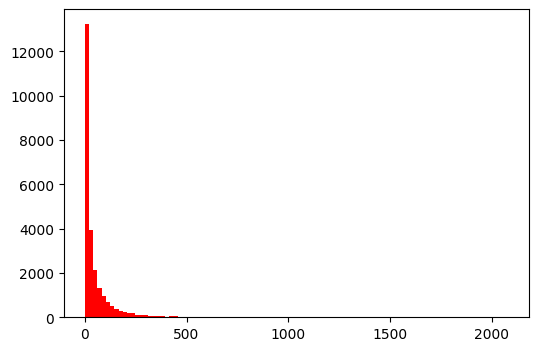

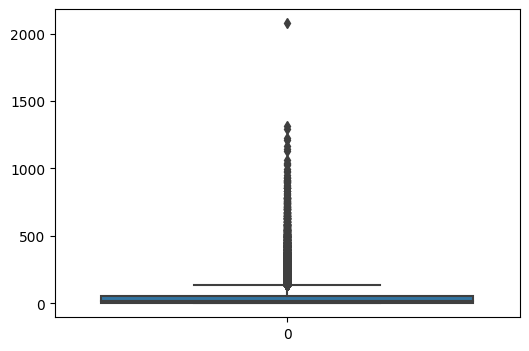

In [1851]:
plt.figure(figsize = (6,4))
plt.hist(My_DF['Shipping_cost_sum'],bins = 100 ,color = 'red')
plt.figure(figsize = (6,4))
sns.boxplot(My_DF['Shipping_cost_sum'])
plt.show()

We have so many outliers in the upper end and the plot is clearly right skewed

In [1852]:
np.percentile(My_DF['Shipping_cost_sum'], [75, 95, 99, 100])

array([  56.18  ,  215.2434,  470.8604, 2076.62  ])

So i clipped 5% of the data from the higher end, it gave us 1.5 ~ 2% better results from the models

In [1853]:
cost_threshold = np.percentile(FE_df['Shipping_cost_sum'], 95)
FE_df = FE_df[FE_df['Shipping_cost_sum'] <= cost_threshold]

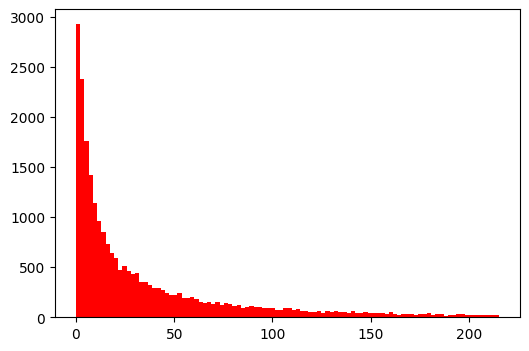

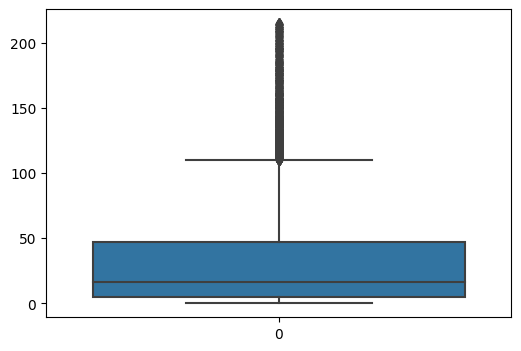

In [1854]:
plt.figure(figsize = (6,4))
plt.hist(FE_df['Shipping_cost_sum'],bins = 100 ,color = 'red')
plt.figure(figsize = (6,4))
sns.boxplot(FE_df['Shipping_cost_sum'])
plt.show()


In [1855]:
price_1 = FE_df[FE_df['Ship Mode'] == 1]['Shipping_cost_sum'].mean()
price_2 = FE_df[FE_df['Ship Mode'] == 2]['Shipping_cost_sum'].mean()
price_3 = FE_df[FE_df['Ship Mode'] == 3]['Shipping_cost_sum'].mean()
price_4 = FE_df[FE_df['Ship Mode'] == 4]['Shipping_cost_sum'].mean()
print("Average shipping cost for Standard Class: ", price_1)
print("Average shipping cost for Second Class: ", price_2)
print("Average shipping cost for First Class: ", price_3)
print("Average shipping cost for Same Day: ", price_4)

Average shipping cost for Standard Class:  30.728019547325104
Average shipping cost for Second Class:  38.51578640153945
Average shipping cost for First Class:  44.69223053981509
Average shipping cost for Same Day:  43.8888462852263


In [1856]:
FE_df.head()

,Order ID,Quantity,Sales,Shipping_cost_sum,Shipping Ratio,Order Priority,Market,LOCATION_ID,Order_to_Ship_Time,Ship Mode
0,AE-2011-9160,8,161.082001,9.56,0.059349,2,EMEA,3303,4,1
1,AE-2013-1130,7,228.996001,60.18,0.262799,3,EMEA,1863,0,4
2,AE-2013-1530,3,23.633999,3.16,0.133706,3,EMEA,1863,3,2
3,AE-2014-2840,1,42.480000,8.04,0.189266,4,EMEA,3303,3,3
4,AE-2014-3830,16,281.501994,19.38,0.068845,2,EMEA,1863,6,1


putting our 'Shipping_cost_sum' feature into log made skew weaker and gave us slightly better results

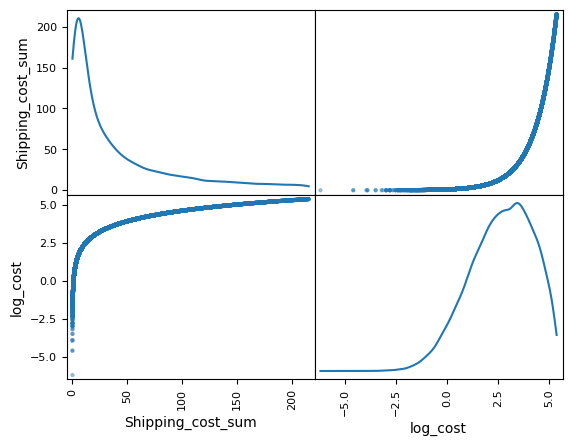

In [1857]:
new_Df = pd.DataFrame()
new_Df['Shipping_cost_sum'] = FE_df['Shipping_cost_sum']
new_Df['log_cost'] = np.log(new_Df['Shipping_cost_sum'])
pd.plotting.scatter_matrix(new_Df, diagonal='kde')
FE_df['log_cost'] = new_Df['log_cost']

In [1858]:
X = FE_df.copy()
X = X.drop(['Order ID','Ship Mode','Shipping_cost_sum','Order_to_Ship_Time'], axis = 1)
y = FE_df['Ship Mode']

In [1859]:
# X['Segment_Home Office'] = X['Segment_Home Office'].map({True:1, False:0})
# X['Segment_Corporate'] = X['Segment_Corporate'].map({True:1, False:0})

In [1860]:
X

,Quantity,Sales,Shipping Ratio,Order Priority,Market,LOCATION_ID,log_cost
0,8,161.082001,0.059349,2,EMEA,3303,2.257588
1,7,228.996001,0.262799,3,EMEA,1863,4.097340
2,3,23.633999,0.133706,3,EMEA,1863,1.150572
3,1,42.480000,0.189266,4,EMEA,3303,2.084429
4,16,281.501994,0.068845,2,EMEA,1863,2.964242
...,...,...,...,...,...,...,...
25028,4,51.075000,0.072834,2,Africa,2403,1.313724
25029,2,25.578000,0.091485,2,Africa,1644,0.850151
25030,2,7.164000,0.048855,2,Africa,2600,-1.049822
25031,3,72.800999,0.056593,2,Africa,1644,1.415853


In [1861]:
label_encoder = LabelEncoder()
X['Market'] = label_encoder.fit_transform(X['Market'])
X

,Quantity,Sales,Shipping Ratio,Order Priority,Market,LOCATION_ID,log_cost
0,8,161.082001,0.059349,2,3,3303,2.257588
1,7,228.996001,0.262799,3,3,1863,4.097340
2,3,23.633999,0.133706,3,3,1863,1.150572
3,1,42.480000,0.189266,4,3,3303,2.084429
4,16,281.501994,0.068845,2,3,1863,2.964242
...,...,...,...,...,...,...,...
25028,4,51.075000,0.072834,2,1,2403,1.313724
25029,2,25.578000,0.091485,2,1,1644,0.850151
25030,2,7.164000,0.048855,2,1,2600,-1.049822
25031,3,72.800999,0.056593,2,1,1644,1.415853


In [1862]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [1863]:
def normalize_features(X):
   X = (X - X.mean()) / X.std()
   return X

In [1864]:
X_train = normalize_features(X_train)
X_test = normalize_features(X_test)

In [1865]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [1866]:
print("Classification report:\n")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Classification report:

              precision    recall  f1-score   support

           1       0.76      0.95      0.84      2933
           2       0.40      0.19      0.26       908
           3       0.52      0.47      0.49       674
           4       0.19      0.02      0.04       242

    accuracy                           0.69      4757
   macro avg       0.47      0.41      0.41      4757
weighted avg       0.63      0.69      0.64      4757

Accuracy: 69.16%


XGBoost

In [1867]:
model_xgboost = XGBClassifier(
    booster='dart',
    n_estimators = 120,
    learning_rate = 0.01,
    tree_method = 'approx',
    max_depth = 10,
    reg_alpha = 1,
    reg_lambda = 1,
)

In [1868]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [1869]:
y_train = y_train - 1
y_test = y_test - 1

In [1870]:
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [1871]:
y_pred = model_xgboost.predict(X_test)
print("Classification report:\n")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Classification report:

              precision    recall  f1-score   support

           0       0.75      0.97      0.84      2933
           1       0.45      0.20      0.28       908
           2       0.58      0.47      0.52       674
           3       0.33      0.02      0.03       242

    accuracy                           0.70      4757
   macro avg       0.53      0.41      0.42      4757
weighted avg       0.65      0.70      0.65      4757

Accuracy: 70.32%


In [1878]:
y_pred,y_test

(array([0, 1, 1, ..., 0, 0, 0], dtype=int64),
 9595     0
 23155    1
 16786    0
 533      1
 6515     0
         ..
 21447    1
 4392     2
 21198    0
 1799     0
 5457     0
 Name: Ship Mode, Length: 4757, dtype: int64)

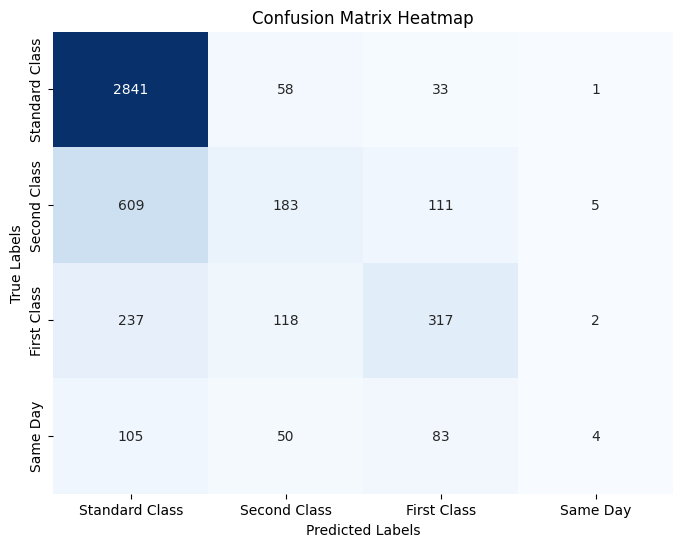

In [1883]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Standard Class', 'Second Class', 'First Class', 'Same Day'], yticklabels=['Standard Class', 'Second Class', 'First Class', 'Same Day'])

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

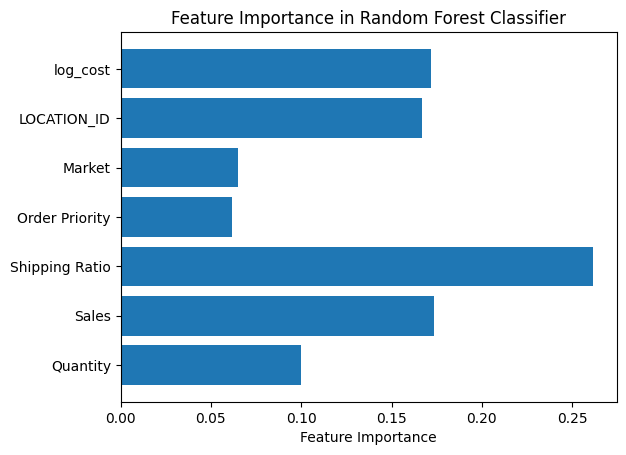

In [1873]:
feature_importances = classifier.feature_importances_

plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

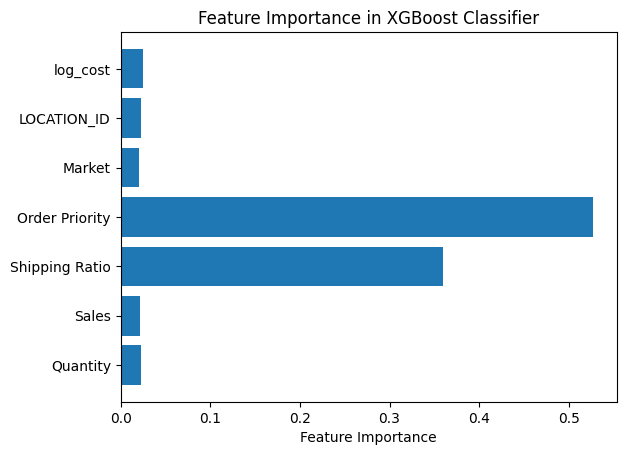

In [1874]:
feature_importances = model_xgboost.feature_importances_

plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in XGBoost Classifier')
plt.show()

Outputting csv file of comparision chart for PowerBI

In [1875]:
# I borrowed this part from Arshia's code

prediction_actual = pd.DataFrame({
    "Order ID": My_DF.loc[X_test.index, "Order ID"] if "Order ID" in My_DF.columns else X_test.index,
    "Actual Profit": y_test,
    "Predicted Profit": y_pred
})
prediction_actual['Actual Profit'] = prediction_actual['Actual Profit'].map({0: 'Standard Class', 1: 'Second Class', 2: 'First Class', 3: 'Same Day'})
prediction_actual['Predicted Profit'] = prediction_actual['Predicted Profit'].map({0: 'Standard Class', 1: 'Second Class', 2: 'First Class', 3: 'Same Day'})
prediction_actual.to_csv("ShipMode_Prediction_Comparison.csv", index=False)


In [1876]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model_xgboost.feature_importances_
}).sort_values("Importance", ascending=False)
feature_importance.to_csv("ShipMode_Feature_Importance.csv", index=False)